In [1]:
from graphviz import Source
import numpy as np
import copy

# Sketch of NN and Lut Network

In [ ]:
header = """
digraph G {

        rankdir=LR
        splines=line
        nodesep=.05;
        node [label=""];
        
        subgraph cluster_0 {
        color=white;
        node [style=solid,color=blue4, shape=circle];
        x0 [pos="0,2.4!"];
        x1 [pos="0,1.8!"];
        x2 [pos="0,1.2!"];
        x3 [pos="0,0.6!"];
        x4 [pos="0,0!"];
        label = "Input";
    }

    subgraph cluster_1 {
        color=white;
        node [style=solid,color=red2, shape=circle];
        a11 [pos="1,2.1!"];
        a12 [pos="1,1.2!"];
        a13 [pos="1,0.3!"];
        label = "Hidden 1";
    }

    subgraph cluster_2 {
        color=white;
        node [style=solid,color=red2, shape=circle];
        a21 [pos="2,2.1!"];
        a22 [pos="2,1.2!"];
        a23 [pos="2,0.3!"];
        label = "Hidden 2";
    }

    subgraph cluster_3 {
        color=white;
        node [style=solid,color=seagreen2, shape=circle];
        O1 [pos="3,1.2!"];
        label="Output";
    }
"""

layers = [["x0", "x1", "x2", "x3", "x4"], ["a11", "a12", "a13"], ["a21", "a22", "a23"], ["O1"]]

In [ ]:
# Neural network
# connection_str = ""
# for i, layer in enumerate(layers):
#     if i == len(layers) - 1:
#         break
#     for left_node in layer:
#         for right_node in layers[i + 1]:
#             connection_str += f"{left_node} -> {right_node};\n"

# Lut network
connection_str = ""
for i in reversed(range(len(layers))):
    if i == 0:
        break
    for right_node in layers[i]:
        for left_node in np.random.choice(layers[i - 1], size=2, replace=False):
            connection_str += f"{left_node} -> {right_node};\n"

In [ ]:
dot = header + connection_str + "}"

s = Source(dot, filename="seminar/images/lut_with_labels", format="pdf", engine="neato")
s

In [ ]:
# s.render()

# Sketch of single NN neuron

In [ ]:
dot = """
digraph G {

    rankdir=LR
    splines=line
    nodesep=.05;
    bgcolor="transparent"

    subgraph cluster_0 {
        color=white;
        node [style=solid,color=blue4, shape=circle];
        1.3 2.4 5.9 1.7 3.1;
        label = "";
    }

    subgraph cluster_1 {
        node [style=solid,color=red2, shape=circle];
        color=white;
        0.7;
        label = "";
    }
    
    1.3 -> 0.7 [label="0.5"];
    2.4 -> 0.7 [label="-1.3"];
    5.9 -> 0.7 [label="-0.2"];
    1.7 -> 0.7 [label="1.1"];
    3.1 -> 0.7 [label="0.8"];

    #label="Neural network";
    #labelloc=top;
}
"""
s = Source(dot, filename="seminar/images/single_neuron_nn", format="pdf")
s

# Sketch of single Lut

In [ ]:
dot = """
digraph G {

    rankdir=LR
    splines=line
    nodesep=.05;
    bgcolor="transparent"

    subgraph cluster_0 {
        color=white;
        node [style=solid,color=blue4, shape=circle];
        x0 [label="1"];
        x1 [label="1"];
        x2 [label="0"];
        x3 [label="1"];
        x4 [label="0"];
    }

    subgraph cluster_1 {
        node [style=solid,color=red2, shape=circle];
        color=white;
        a0 [label="0"];
    }
    
    x0;
    x1 -> a0;
    x2;
    x3;
    x4 -> a0;

    #label="Neural network";
    #labelloc=top;
}
"""
s = Source(dot, filename="seminar/images/single_neuron_lut", format="pdf")
s

# Seminar Lut Network practical example

In [ ]:
dot = """
digraph G {

    rankdir=LR
    splines=line
    nodesep=.05;
    bgcolor="transparent"

    subgraph cluster_0 {
        color=white;
        node [style=solid,color=blue4, shape=circle];
        x0 [label="0", pos="0,2.4!"];
        x1 [label="1", pos="0,1.8!"];
        x2 [label="0", pos="0,1.2!"];
        x3 [label="1", pos="0,0.6!"];
        x4 [label="1", pos="0,0!"];
    }

    subgraph cluster_1 {
        node [style=solid,color=red2, shape=circle];
        color=white;
        a0 [label="0", fontcolor="black", pos="1.2,1.8!"];
        a1 [label="1", fontcolor="black", pos="1.2,0.6!"];
    }
    
    subgraph cluster_2 {
        node [style=solid,color=seagreen2, shape=circle];
        color=white;
        a2 [label=1, fontcolor="black", pos="2,1.8"];
    }
    

    x0 -> a0;
    x1 -> a1;
    x2;
    x3 -> a0;
    x4 -> a1;
    a0 -> a2;
    a1 -> a2;
    

    #label="Neural network";
    #labelloc=top;
}
"""
s = Source(dot, filename="seminar/images/ex/03", format="pdf", engine="neato")
s

In [ ]:
# s.render()

# AIG for local search sketch

In [2]:
num_inputs = 5
hidden_layers = [4, 4]
num_outputs = 1

dot = 'digraph "test_net.aag" {\n'
var_idx = 0
curr_layer = []
prev_layer = []

for _ in range(num_inputs):
    dot += f"I{var_idx}[shape=triangle,color=blue];\n"
    var_idx += 1
    dot += f'"{var_idx * 2}"[shape=box];\n'
    dot += f'"{var_idx * 2}"->I{var_idx - 1}[arrowhead=none];\n'
    prev_layer.append(var_idx * 2)
    
path = [
    (26, 12, "none"),
    (26, 16, "dot"),
    (22, 12, "none"),
    (22, 18, "dot"),
    (12, 6, "none"),
    (12, 10, "none"),
    (18, 8, "dot"),
    (18, 4, "dot"),
    (16, 10, "dot"),
    (16, 4, "dot"),
]

for item in path:
    dot += f'"{item[0]}"[style=solid];\n'
    dot += f'"{item[1]}"[style=solid];\n'
    dot += f'"{item[0]}"->"{item[1]}"[arrowhead={item[2]}]\n'

for num_nodes in hidden_layers:
    for _ in range(num_nodes):
        var_idx += 1
        if var_idx * 2 not in [x[0] for x in path]:
            dot += f'"{var_idx * 2}"[style=dotted];\n'
        curr_layer.append(var_idx * 2)
        for prev_node in prev_layer:
            if (var_idx * 2, prev_node) not in [(x[0], x[1]) for x in path]:
                dot += f'"{var_idx * 2}"->{prev_node}[arrowhead=none, style=dotted];\n'
    prev_layer = copy.deepcopy(curr_layer)
    curr_layer = []

dot += """
"28"->"22"[arrowhead=none];
"28"->"26"[arrowhead=none];
O0[shape=triangle,color=blue];
O0 -> "28"[arrowhead=none];
"""

dot += "}"

In [3]:
print(dot)

digraph "test_net.aag" {
I0[shape=triangle,color=blue];
"2"[shape=box];
"2"->I0[arrowhead=none];
I1[shape=triangle,color=blue];
"4"[shape=box];
"4"->I1[arrowhead=none];
I2[shape=triangle,color=blue];
"6"[shape=box];
"6"->I2[arrowhead=none];
I3[shape=triangle,color=blue];
"8"[shape=box];
"8"->I3[arrowhead=none];
I4[shape=triangle,color=blue];
"10"[shape=box];
"10"->I4[arrowhead=none];
"26"[style=solid];
"12"[style=solid];
"26"->"12"[arrowhead=none]
"26"[style=solid];
"16"[style=solid];
"26"->"16"[arrowhead=dot]
"22"[style=solid];
"12"[style=solid];
"22"->"12"[arrowhead=none]
"22"[style=solid];
"18"[style=solid];
"22"->"18"[arrowhead=dot]
"12"[style=solid];
"6"[style=solid];
"12"->"6"[arrowhead=none]
"12"[style=solid];
"10"[style=solid];
"12"->"10"[arrowhead=none]
"18"[style=solid];
"8"[style=solid];
"18"->"8"[arrowhead=dot]
"18"[style=solid];
"4"[style=solid];
"18"->"4"[arrowhead=dot]
"16"[style=solid];
"10"[style=solid];
"16"->"10"[arrowhead=dot]
"16"[style=solid];
"4"[style=solid];
"1

In [32]:
with open(r"thesis/standalone/aig/aig-init.dot", "w") as f:
    f.write(dot)

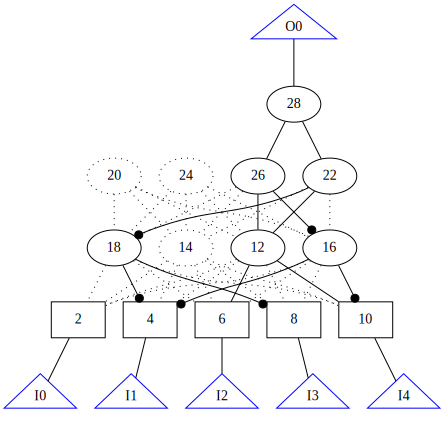

In [29]:
s = Source(dot, filename="test_aig", format="pdf", engine=None)
s

# Lut network tikz figure

```
\begin{scope}[every node/.style={circle, draw, minimum size=8mm}]
    \node (x0) at (0, 0) {$x_0$};
    \node (x1) at (0,-1.5) {$x_1$};
    \node (x2) at (0,-3) {$x_2$};
    \node (a3) at (1.5,-0.75)  {$f_0$};
    \node (a4) at (1.5,-2.25) {$f_1$};
    \node (a5) at (3,-1.5) {$f_2$};
\end{scope}

\begin{scope}[-latex, thick]
    \draw (x0) -- (a3);
    \draw (x0) -- (a4);
    \draw (x1) -- (a3);
    \draw (x2) -- (a4);
    \draw (a3) -- (a5);
    \draw (a4) -- (a5);
\end{scope}
```

In [2]:
num_inputs = 5
hidden_layers = [4, 4, 4]

pos_x = 0
pos_y = 0
diff_x = 2.0
diff_y = -1.5

nodes = []
out = "\\begin{scope}[every node/.style={circle, draw, minimum size=8mm}]\n"
nodes_layer = []
for i in range(num_inputs):
    name = f"x{i}"
    out += f"\\node ({name}) at ({pos_x}, {pos_y + i * diff_y}) " + "{$x_" + f"{i}" + "$};\n"
    nodes_layer.append(name)
nodes.append(nodes_layer)

lut_cnt = 0
for i in range(len(hidden_layers)):
    pos_x += diff_x
    if i == 0:
        pos_y += diff_y / 2
    nodes_layer = []
    for j in range(hidden_layers[i]):
        name = f"f{lut_cnt}"
        out += f"\\node ({name}) at ({pos_x}, {pos_y + j * diff_y}) " + "{$f_{" + f"{lut_cnt}" + "}$};\n"
        lut_cnt += 1
        nodes_layer.append(name)
    nodes.append(nodes_layer)
    
out += "\\node (f12) at (8, -3.0) {$f_{12}$};\n"
out += "\end{scope}\n"
out += "\\begin{scope}[-latex, thick]\n"

for i in range(1, len(nodes)):
    for to_node in nodes[i]:
        for from_node in np.random.choice(nodes[i - 1], size=2, replace=False):
                out += "\draw (" + f"{from_node}) -- ({to_node});\n"

out += "\draw(f8) -- (f12);\n"
out += "\draw(f10) -- (f12);\n"
out += "\end{scope}\n"

In [4]:
print(out)

\begin{scope}[every node/.style={circle, draw, minimum size=8mm}]
\node (x0) at (0, 0.0) {$x_0$};
\node (x1) at (0, -1.5) {$x_1$};
\node (x2) at (0, -3.0) {$x_2$};
\node (x3) at (0, -4.5) {$x_3$};
\node (x4) at (0, -6.0) {$x_4$};
\node (f0) at (2.0, -0.75) {$f_{0}$};
\node (f1) at (2.0, -2.25) {$f_{1}$};
\node (f2) at (2.0, -3.75) {$f_{2}$};
\node (f3) at (2.0, -5.25) {$f_{3}$};
\node (f4) at (4.0, -0.75) {$f_{4}$};
\node (f5) at (4.0, -2.25) {$f_{5}$};
\node (f6) at (4.0, -3.75) {$f_{6}$};
\node (f7) at (4.0, -5.25) {$f_{7}$};
\node (f8) at (6.0, -0.75) {$f_{8}$};
\node (f9) at (6.0, -2.25) {$f_{9}$};
\node (f10) at (6.0, -3.75) {$f_{10}$};
\node (f11) at (6.0, -5.25) {$f_{11}$};
\node (f12) at (8, -3.0) {$f_{12}$};
\end{scope}
\begin{scope}[-latex, thick]
\draw (x4) -- (f0);
\draw (x1) -- (f0);
\draw (x4) -- (f1);
\draw (x2) -- (f1);
\draw (x2) -- (f2);
\draw (x3) -- (f2);
\draw (x2) -- (f3);
\draw (x1) -- (f3);
\draw (f0) -- (f4);
\draw (f2) -- (f4);
\draw (f0) -- (f5);
\draw (f1) -

# fig:third_network

In [26]:
mid_y

-2.25

In [30]:
pos_y = mid_y - (diff_y * 4) / 2

-3.0

In [38]:
num_inputs = 4
hidden_layers = [5, 3, 1]

pos_x = 0
pos_y = 0
diff_x = 2.0
diff_y = -1.5
mid_y = (diff_y * (num_inputs - 1) + pos_y) / 2

nodes = []
out = "\\begin{scope}[every node/.style={circle, draw, minimum size=8mm}]\n"
nodes_layer = []
for i in range(num_inputs):
    name = f"x{i}"
    out += f"\\node ({name}) at ({pos_x}, {pos_y + i * diff_y}) " + "{$x_" + f"{i}" + "$};\n"
    nodes_layer.append(name)
nodes.append(nodes_layer)

lut_cnt = 0
for i in range(len(hidden_layers)):
    pos_x += diff_x
    pos_y = mid_y - (diff_y * (hidden_layers[i] - 1)) / 2
    nodes_layer = []
    for j in range(hidden_layers[i]):
        name = f"a{lut_cnt}"
        out += f"\\node ({name}) at ({pos_x}, {pos_y + j * diff_y}) " + "{$a_{" + f"{j}" + "}^" + "{[" f"{i + 1}" + "]}$};\n"
        nodes_layer.append(name)
        lut_cnt += 1
    nodes.append(nodes_layer)
    
out += "\end{scope}\n"
out += "\\begin{scope}[-latex, thick]\n"

for i in range(1, len(nodes)):
    for to_node in nodes[i]:
        for from_node in nodes[i - 1]:
                out += "\draw (" + f"{from_node}) -- ({to_node});\n"

out += "\end{scope}\n"

In [39]:
print(out)

\begin{scope}[every node/.style={circle, draw, minimum size=8mm}]
\node (x0) at (0, 0.0) {$x_0$};
\node (x1) at (0, -1.5) {$x_1$};
\node (x2) at (0, -3.0) {$x_2$};
\node (x3) at (0, -4.5) {$x_3$};
\node (a0) at (2.0, 0.75) {$a_{0}^{[1]}$};
\node (a1) at (2.0, -0.75) {$a_{1}^{[1]}$};
\node (a2) at (2.0, -2.25) {$a_{2}^{[1]}$};
\node (a3) at (2.0, -3.75) {$a_{3}^{[1]}$};
\node (a4) at (2.0, -5.25) {$a_{4}^{[1]}$};
\node (a5) at (4.0, -0.75) {$a_{0}^{[2]}$};
\node (a6) at (4.0, -2.25) {$a_{1}^{[2]}$};
\node (a7) at (4.0, -3.75) {$a_{2}^{[2]}$};
\node (a8) at (6.0, -2.25) {$a_{0}^{[3]}$};
\end{scope}
\begin{scope}[-latex, thick]
\draw (x0) -- (a0);
\draw (x1) -- (a0);
\draw (x2) -- (a0);
\draw (x3) -- (a0);
\draw (x0) -- (a1);
\draw (x1) -- (a1);
\draw (x2) -- (a1);
\draw (x3) -- (a1);
\draw (x0) -- (a2);
\draw (x1) -- (a2);
\draw (x2) -- (a2);
\draw (x3) -- (a2);
\draw (x0) -- (a3);
\draw (x1) -- (a3);
\draw (x2) -- (a3);
\draw (x3) -- (a3);
\draw (x0) -- (a4);
\draw (x1) -- (a4);
\draw (